In [25]:
!pip install ipywidgets


In [26]:
!pip install category_encoders

Importing

In [27]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge
from category_encoders import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, mean_squared_log_error)

from ipywidgets import Dropdown, FloatSlider, interact
import matplotlib.pyplot as plt

Data pre-processing function

In [4]:
def wrangle(filepath):
  df=pd.read_csv(filepath)
  return df

Perforcmance Matrics Function

In [5]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2*100}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape}')
    print(f'Mean Squared Logarithmic Error (MSLE): {msle}')


loading dataset in dataframe

In [6]:
df=wrangle("honey_purity_dataset.csv")

In [7]:
df.isna().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB
None


In [9]:
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


Defining feature matrix and target vector

In [10]:
feature_matrix=["CS","Density","WC","pH","EC","F","G","Pollen_analysis","Viscosity","Purity"]
target="Price"
X=df[feature_matrix]
y=df[target]


Splitting dataset into training and testing dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Creating machine learing pipeline that contains encoder that convert string data in "Pollen_analysis" into nuemerical and using linear regression

In [12]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
   LinearRegression()
)
model_lr.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pollen_analysis'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [13]:
y_pred_test = model_lr.predict(X_test)

In [14]:
evaluate_model(y_test,y_pred_test)

Mean Absolute Error (MAE): 26.234055425854695
Mean Squared Error (MSE): 1253.6177260146849
Root Mean Squared Error (RMSE): 35.406464466459866
R-squared (R²): 97.6963245944954
Mean Absolute Percentage Error (MAPE): 0.07411145007316546
Mean Squared Logarithmic Error (MSLE): 0.03766946792091457


Scatter Plot

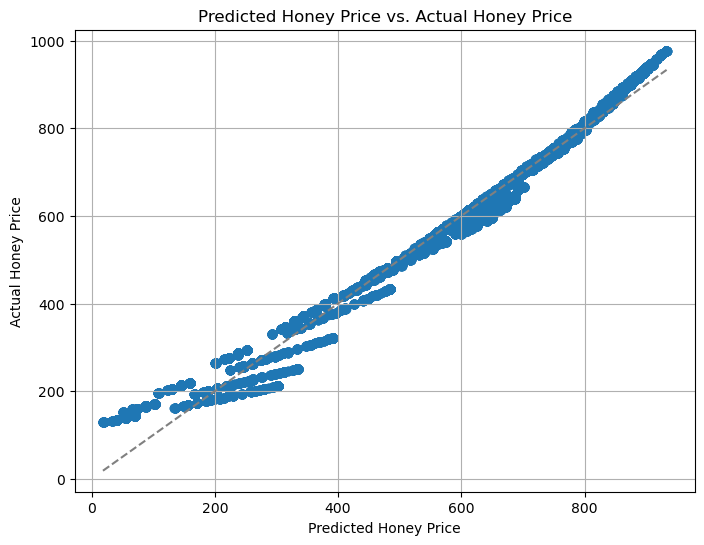

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, y_test)

plt.xlabel("Predicted Honey Price")
plt.ylabel("Actual Honey Price")

plt.title("Predicted Honey Price vs. Actual Honey Price")


plt.plot([min(y_pred_test), max(y_pred_test)], [min(y_pred_test), max(y_pred_test)], color='gray', linestyle='--')

plt.grid(True)  #
plt.show()

Using Ridge regression for hyper perameter tuning

In [16]:
model_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
   Ridge()
)
model_ridge.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pollen_analysis'], use_cat_names=True)),
                ('ridge', Ridge())])

In [17]:
y_pred_test = model_ridge.predict(X_test)

In [18]:
evaluate_model(y_test,y_pred_test)

Mean Absolute Error (MAE): 26.237407221673003
Mean Squared Error (MSE): 1253.5845000229385
Root Mean Squared Error (RMSE): 35.405995255365134
R-squared (R²): 97.69638565130595
Mean Absolute Percentage Error (MAPE): 0.07408888697007623
Mean Squared Logarithmic Error (MSLE): 0.03757959116800033


using knn model to see if it has any performance improvment

In [19]:
model_knn = make_pipeline(
    OneHotEncoder(use_cat_names=True),
   KNeighborsRegressor(n_neighbors=3)
)
model_knn.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pollen_analysis'], use_cat_names=True)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [20]:
evaluate_model(y_test,y_pred_test)

Mean Absolute Error (MAE): 26.237407221673003
Mean Squared Error (MSE): 1253.5845000229385
Root Mean Squared Error (RMSE): 35.405995255365134
R-squared (R²): 97.69638565130595
Mean Absolute Percentage Error (MAPE): 0.07408888697007623
Mean Squared Logarithmic Error (MSLE): 0.03757959116800033


taking 4 neighbors in knn for hyper perameter tuning

In [21]:
model_knn_improved = make_pipeline(
    OneHotEncoder(use_cat_names=True),
   KNeighborsRegressor(n_neighbors=4)
)
model_knn_improved.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pollen_analysis'], use_cat_names=True)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=4))])

In [22]:
evaluate_model(y_test,y_pred_test)

Mean Absolute Error (MAE): 26.237407221673003
Mean Squared Error (MSE): 1253.5845000229385
Root Mean Squared Error (RMSE): 35.405995255365134
R-squared (R²): 97.69638565130595
Mean Absolute Percentage Error (MAPE): 0.07408888697007623
Mean Squared Logarithmic Error (MSLE): 0.03757959116800033



Creating a user-interactive interface to check price for different inputs

In [28]:
def make_prediction(CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity):
    data={
        "CS":CS,
        "Density":Density,
        "WC":WC,
        "pH":pH,
        "EC":EC,
        "F":F,
        "G":G,
        "Pollen_analysis":Pollen_analysis,
        "Viscosity":Viscosity,
        "Purity":Purity
    }
    df=pd.DataFrame(data,index=[0])
    prediction = model_lr.predict(df).round(2)[0]
    return f"Predicted honey price: ${prediction}"

In [29]:
interact(
    make_prediction,
    CS=FloatSlider(
        min=X_train["CS"].min(),
        max=X_train["CS"].max(),
        step=0.01,
        value=X_train["CS"].mean(),
    ),
    Density=FloatSlider(
        min=X_train["Density"].min(),
        max=X_train["Density"].max(),
        step=0.01,
        value=X_train["Density"].mean(),
    ),
    WC=FloatSlider(
        min=X_train["WC"].min(),
        max=X_train["WC"].max(),
        step=0.01,
        value=X_train["WC"].mean(),
    ),
    pH=FloatSlider(
        min=X_train["pH"].min(),
        max=X_train["pH"].max(),
        step=0.01,
        value=X_train["pH"].mean(),
    ),
    EC=FloatSlider(
        min=X_train["EC"].min(),
        max=X_train["EC"].max(),
        step=0.01,
        value=X_train["EC"].mean(),
    ),
    F=FloatSlider(
        min=X_train["F"].min(),
        max=X_train["F"].max(),
        step=0.01,
        value=X_train["F"].mean(),
    ),
    G=FloatSlider(
        min=X_train["G"].min(),
        max=X_train["G"].max(),
        step=0.01,
        value=X_train["G"].mean(),
    ),
    Viscosity=FloatSlider(
        min=X_train["Viscosity"].min(),
        max=X_train["Viscosity"].max(),
        step=0.01,
        value=X_train["Viscosity"].mean(),
    ),
    Purity=FloatSlider(
        min=X_train["Purity"].min(),
        max=X_train["Purity"].max(),
        step=0.01,
        value=X_train["Purity"].mean(),
    ),
    Pollen_analysis=Dropdown(options=sorted(X_train["Pollen_analysis"].unique())),
);

interactive(children=(FloatSlider(value=5.50306627605611, description='CS', max=10.0, min=1.0, step=0.01), Flo…

In conclusion 97.69 is the highest accuracy so far